In [11]:
!pip install emoji
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 26.0 MB/s eta 0:00:00


##Preprocess

In [181]:
import pandas as pd

df = pd.read_csv('DataSet.csv')
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

In [182]:
df.drop_duplicates(subset=['title','location', 'department' , 'salary_range', 'company_profile', 'description', 'requirements', 'benefits','telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent'], keep='first', inplace=True)
df.shape

(17632, 18)

In [183]:
display(df)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


In [184]:
unique_values = df['salary_range'].unique()
print(unique_values)

[nan '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '50000-70000' '45000-60000'
 '30000-40000' '70000-90000' '10000-14000' '50-110' '28000-45000'
 '0-34300' '35000-40000' '9-12' '44000-57000' '18500-28000' '55000-75000'
 '30000-35000' '0-0' '20000-40000' '360000-600000' '50000-80000'
 '80000-100000' '52000-78000' '15750-15750' '40000-65000' '45000-50000'
 '30000-37000' '45000-67000' '35000-100000' '180000-216000' '45000-65000'
 '28000-32000' '0-1000' '36000-40000' '80000-110000' '35000-73000'
 '19000-19000' '60000-120000' '120000-15000000' '42000-55000'
 '90000-120000' '100000-150000' '28000-38000' '1600-1700' '50000-60000'
 '30000-70000' '32000-40000' '50-100' '9000-17000' '23040-28800' '105-110'
 '13000-16000' '100000-180000' '45000-55000' '9000-12000' '50000-90000'
 '25000-42000' '40000-60000' '600000-750000' '120000-170000' '45000-90000'
 '25000-30000'

## Feature Engineering

In [185]:
display(df)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


In [186]:
import emoji, string
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# TEXT PREPROCESSING FOR TEXTUAL COLUMNS

def clean_text_features(text):
    try:

      if pd.isnull(text):
        return ""

      #removing HTML tags
      text =  re.sub(r'<[^>]*>', '', text)

      # lowercase
      text = text.lower()

      # remove non alpha numeric
      text = re.sub(r'[^\w\s\.,:;!?\'"-]', '', text)

      # remove punctuation
      text = "".join([i for i in text if i not in string.punctuation])

      #remove emojis
      text = emoji.replace_emoji(text, replace="")

      # tokenize then remove stopwords
      words = text.split()
      stop_words = set(stopwords.words("english"))
      filtered_words = [word for word in words if word not in stop_words]

      # Rejoin words to form the cleaned text
      text = " ".join(filtered_words)

      return text

    except Exception as e:
      print(text)


df['clean_title'] = df['title'].apply(clean_text_features)
df['clean_benefits'] = df['benefits'].apply(clean_text_features)
df['clean_description'] = df['description'].apply(clean_text_features)
df['clean_requirements'] = df['requirements'].apply(clean_text_features)
df['clean_company_profile'] = df['company_profile'].apply(clean_text_features)
df['clean_combined_text_data'] = df['clean_title'] + ' ' + df['clean_description'] + ' ' + df['clean_requirements'] + ' ' + df['clean_company_profile'] + ' ' + df['clean_benefits']

# Encoding categorical columns
categorical_columns = ['location', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
encoded_features = []

for column in categorical_columns:
    if column in df.columns:
        le = LabelEncoder()
        encoded_column = le.fit_transform(df[column].fillna('Unknown'))  # Fill NaN with 'Unknown'
        df[f"{column}_encoded"] = encoded_column

# Encoding binary columns
binary_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'in_balanced_dataset']
for column in binary_columns:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: 1 if x == 't' else 0)  # Convert 't' to 1 and 'f' to 0


# DROPPING RAW TEXTUAL COLUMNS THAT ARE UNUSED

columns_to_drop = ['title','benefits','description','requirements','company_profile','in_balanced_dataset',
                   'clean_title',	'clean_benefits',	'clean_description',	'clean_requirements',
                 'clean_company_profile', 'location', 'department', 'salary_range',
                 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
df.drop(columns_to_drop, axis = 1, inplace = True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
display(df)

,telecommuting,has_company_logo,has_questions,fraudulent,clean_combined_text_data,location_encoded,department_encoded,employment_type_encoded,required_experience_encoded,required_education_encoded,industry_encoded,function_encoded
0,0,1,0,0,marketing intern food52 fastgrowing james bear...,2535,758,2,4,9,123,22
1,0,1,0,0,customer service cloud video production organi...,1073,1161,1,6,9,75,7
2,0,1,0,0,commissioning machinery assistant cma client l...,1867,1241,5,7,9,123,36
3,0,1,0,0,account executive washington dc company esri e...,1703,1054,1,5,1,22,31
4,0,1,1,0,bill review manager job title itemization revi...,1741,1241,1,5,1,51,16
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,account director distribution case first time ...,166,1054,1,5,9,22,31
17876,0,1,1,0,payroll accountant payroll accountant focus pr...,2734,62,1,5,1,61,0
17877,0,0,0,0,project cost control staff engineer cost contr...,2875,1241,1,7,9,123,36
17878,0,0,1,0,graphic designer nemsia studios looking experi...,1045,1241,0,6,6,48,9


## Train Val Test Split (Text and Categorical)

In [209]:
from sklearn.model_selection import train_test_split

X = df.drop('fraudulent', axis=1, inplace=False)
y = df['fraudulent']  # Target variable to predict

# 70-15-15 train val test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.15 / 0.85, random_state=42)

In [210]:
display(X_train.shape)

(12342, 11)

In [211]:
display(X_val.shape)

(2645, 11)

In [212]:
display(X_test.shape)

(2645, 11)

In [213]:
display(y_train.shape)

(12342,)

In [214]:
display(y_val.shape)

(2645,)

In [215]:
display(y_test.shape)

(2645,)

## Train Val Test Split (No Combined Cleaned Text)

In [216]:
from sklearn.model_selection import train_test_split

X = df.drop('fraudulent', axis=1, inplace=False)
y = df['fraudulent']  # Target variable to predict
X_cat = X.drop('clean_combined_text_data', axis = 1)
# 70-15-15 train val test split
X_temp, X_test_cat, y_temp, y_test_cat = train_test_split(X_cat, y, test_size = 0.15, random_state=0)
X_train_cat, X_val_cat, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.15 / 0.85, random_state=42)

In [217]:
display(X_train_cat.shape)

(12342, 10)

In [218]:
display(X_val_cat.shape)

(2645, 10)

In [219]:
display(X_test_cat.shape)

(2645, 10)

In [220]:
display(y_train.shape)

(12342,)

In [221]:
display(y_val.shape)

(2645,)

In [222]:
display(y_test.shape)

(2645,)

## Embeddings for Text

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [196]:
#Count Vectorizer Embedding
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train['clean_combined_text_data'])
X_train_count =  count_vect.transform(X_train['clean_combined_text_data'])
X_val_count = count_vect.transform(X_val['clean_combined_text_data'])
X_test_count = count_vect.transform(X_test['clean_combined_text_data'])

#TFIDF Embedding
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_combined_text_data'])
X_train_tfidf = tfidf_vect.transform(X_train['clean_combined_text_data'])
X_val_tfidf = tfidf_vect.transform(X_val['clean_combined_text_data'])
X_test_tfidf = tfidf_vect.transform(X_test['clean_combined_text_data'])

Check for same text features

In [197]:
display(X_train_count.shape)
display(X_val_count.shape)
display(X_test_count.shape)

(12342, 60648)

(2645, 60648)

(2645, 60648)

In [198]:
display(X_train_tfidf.shape)
display(X_val_tfidf.shape)
display(X_test_tfidf.shape)

(12342, 60583)

(2645, 60583)

(2645, 60583)

## ML Models

### Log Reg

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(max_iter= 3000)

Categorical Only

In [227]:
# Fit the model to the training data
model.fit(X_train_cat, y_train)

# Evaluate on validation set (to minimize loss)
val_pred_proba = model.predict_proba(X_val_cat)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC-ROC: {val_auc:.4f}")

# Final evaluation on test set
test_pred = model.predict(X_test_cat)
test_pred_proba = model.predict_proba(X_test_cat)[:, 1]

accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
auc = roc_auc_score(y_test, test_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test AUC-ROC: {auc:.4f}")

Validation AUC-ROC: 0.8145
Test Accuracy: 0.9554
Test Precision: 0.8000
Test Recall: 0.0645
Test F1 Score: 0.1194
Test AUC-ROC: 0.8348


Count Vect

In [228]:
# Fit the model to the training data
model.fit(X_train_count, y_train)

# Evaluate on validation set (to minimize loss)
val_pred_proba = model.predict_proba(X_val_count)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC-ROC: {val_auc:.4f}")

# Final evaluation on test set
test_pred = model.predict(X_test_count)
test_pred_proba = model.predict_proba(X_test_count)[:, 1]

accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
auc = roc_auc_score(y_test, test_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test AUC-ROC: {auc:.4f}")

Validation AUC-ROC: 0.9768
Test Accuracy: 0.9849
Test Precision: 0.9118
Test Recall: 0.7500
Test F1 Score: 0.8230
Test AUC-ROC: 0.9779


TFIDF

In [229]:
# Fit the model to the training data
model.fit(X_train_tfidf, y_train)

# Evaluate on validation set (to minimize loss)
val_pred_proba = model.predict_proba(X_val_tfidf)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC-ROC: {val_auc:.4f}")

# Final evaluation on test set
test_pred = model.predict(X_test_tfidf)
test_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
auc = roc_auc_score(y_test, test_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test AUC-ROC: {auc:.4f}")

Validation AUC-ROC: 0.9761
Test Accuracy: 0.9769
Test Precision: 1.0000
Test Recall: 0.5081
Test F1 Score: 0.6738
Test AUC-ROC: 0.9848


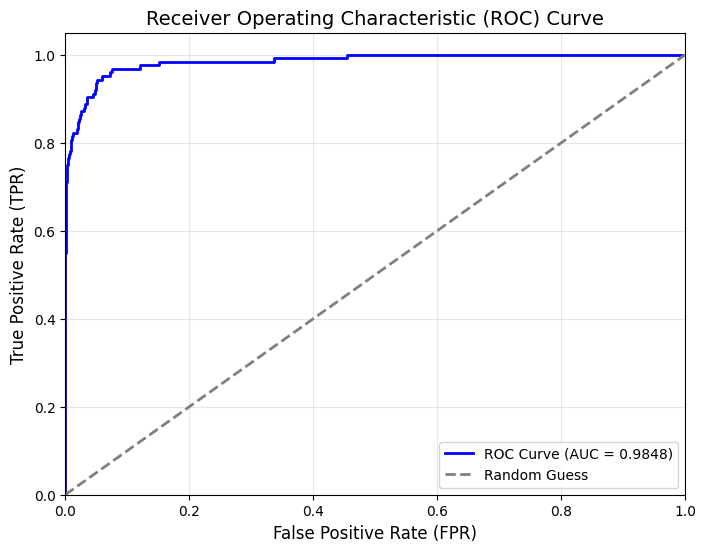

In [230]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

### NN